In [1]:
import os
import math
import ROOT as R

Welcome to JupyROOT 6.22/00


In [2]:
R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.05)
# R.gStyle.SetPadLeftMargin(0.15)
R.gStyle.SetPadTopMargin(0.05)
R.gStyle.SetPadLeftMargin(0.12)

## Calorimeter hits

In [3]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit'
FILE_IN = os.path.join(DIR_IN, 'mars15/mumi-1e3x500-26m-lowth-excl_t25ns_n150MeV_calHits.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('tree')

In [80]:
histos = [R.TH1F('h_{0:d}'.format(i), ';Z origin [cm];BIB particles', 1000, -1000, 1000) for i in range(6)]
cmd = 'mcp_bib_vtx_z / 10'
sels = [
    f'col_id == 0 && side == 0',
    f'col_id == 1 && side < 0',
    f'col_id == 1 && side > 0',
    f'col_id == 2 && side == 0',
    f'col_id == 3 && side < 0',
    f'col_id == 3 && side > 0',
]
for ih, h in enumerate(histos):
    sel = f'col_id == {ih}'
    tree.Draw(f'{cmd} >> h_{ih}', sels[ih])

In [5]:
C = R.TCanvas('c2d', '', 1000, 700)
C.SetGrid(1,1)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.05)

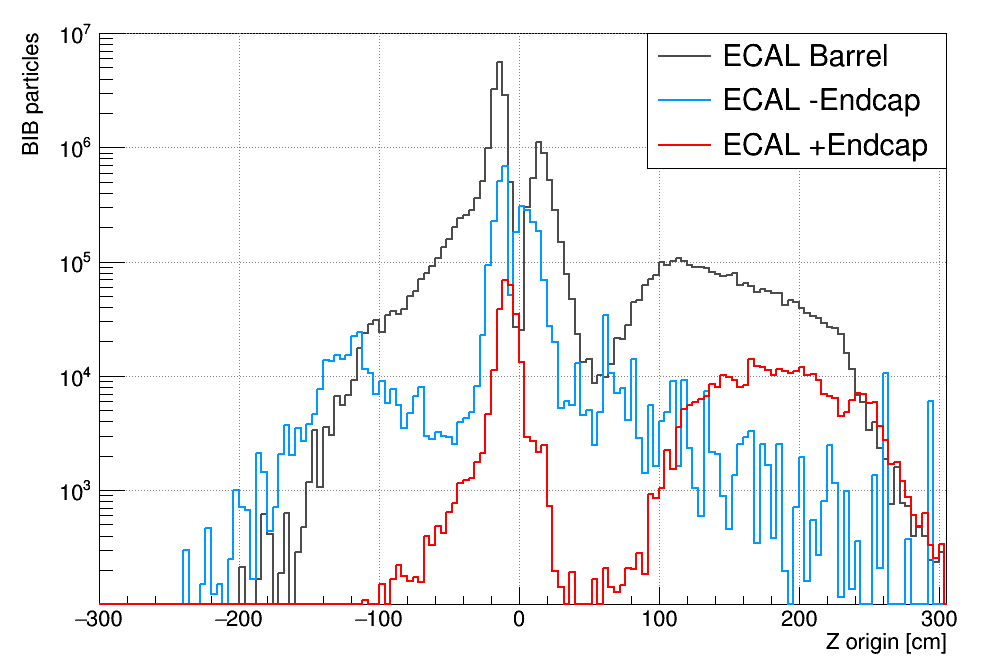

In [84]:
colors = [12, R.kAzure+7, 2]
leg = R.TLegend(0.2, 0.75, 0.45, 0.95)
# HCAL
C.SetLogy(True)
legs = ['HCAL Barrel', 'HCAL -Endcap ', 'HCAL +Endcap']
h_ax = R.TH1F('h_axis', ';Z origin [cm];BIB particles', 400, -1000, 1000)
h_ax.SetAxisRange(1e2, 1e5, 'Y')
h_ax.SetAxisRange(-450, 450, 'X')
h_ax.Draw()
for ih, _h in enumerate(histos[3:]):
    h = _h.Clone()
    h.Rebin(4)
    h.SetLineWidth(2)
    h.SetLineColor(colors[ih])
    leg.AddEntry(h, legs[ih], 'L')
    h.Draw('same hist')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/hcal_bib_vtx_z.pdf'))
# ECAL
C.SetLogy(True)
scale = [1, 1, 1]
legs = ['ECAL Barrel', 'ECAL -Endcap', 'ECAL +Endcap']
h_ax.SetAxisRange(1e2, 1e7, 'Y')
h_ax.SetAxisRange(-300, 300, 'X')
h_ax.Draw()
leg = R.TLegend(0.65, 0.75, 0.95, 0.95)
for ih, _h in enumerate(histos[:3]):
    h = _h.Clone()
    h.Scale(scale[ih])
    h.Rebin(2)
    h.SetLineWidth(2)
    h.SetLineColor(colors[ih])
    leg.AddEntry(h, f'{legs[ih]}', 'L')
    h.Draw('same hist')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/ecal_bib_vtx_z.pdf'))

### 2D positions

In [85]:
histos = [R.TH2I('h_{0:d}'.format(i), 'BIB Origin', 10000, -500, 500, 2500, 0, 300) for i in range(6)]
histos_pos = [R.TH2I('hp_{0:d}'.format(i), 'Hit position', 10000, -500, 500, 2500, 0, 300) for i in range(6)]
cmd = 'mcp_bib_vtx_r/10:mcp_bib_vtx_z/10'
cmd_pos = 'pos_r/10:pos_z/10'
sels = [
    f'col_id == 0 && side == 0',
    f'col_id == 1 && side < 0',
    f'col_id == 1 && side > 0',
    f'col_id == 2 && side == 0',
    f'col_id == 3 && side < 0',
    f'col_id == 3 && side > 0',
]
for ih, h in enumerate(histos):
    sel = f'col_id == {ih}'
    tree.Draw(f'{cmd} >> h_{ih}', sels[ih])
    tree.Draw(f'{cmd_pos} >> hp_{ih}', sels[ih])

In [89]:
C = R.TCanvas('c2d', '', 1500, 1150)
C.SetGrid(1,1)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.05)

In [90]:
colors = [1, R.kAzure+7, 2]
colors_pos = [14, R.kAzure+6, R.kRed-9]
markers = [7, 6, 1]
leg = R.TLegend(0.4, 0.35, 0.65, 0.55)
# HCAL
C.SetLogy(False)
legs = ['HCAL Barrel', 'HCAL -Endcap ', 'HCAL +Endcap']
h_ax = R.TH1F('h_axis', ';Z origin [cm];R origin [cm]', 400, -1000, 1000)
h_ax.SetAxisRange(0, 250, 'Y')
h_ax.SetAxisRange(-450, 450, 'X')
h_ax.Draw()
for ih, h in enumerate(histos[3:]):
#     h = _h.Clone()
#     h.Rebin(2)
    h.SetMarkerColor(colors[ih])
    h.SetLineColor(colors[ih])
    h.SetLineWidth(2)
    h.SetMarkerStyle(markers[ih])
    leg.AddEntry(h, legs[ih], 'L')
    h.Draw('same')
for ih, h in enumerate(histos_pos[3:]):
    h.SetMarkerColor(colors_pos[ih])
    h.SetMarkerStyle(1)
    h.Draw('same')
leg.Draw()
# C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/hcal_bib_vtx_rz.png'))
# ECAL
C.SetLogy(False)
legs = ['ECAL Barrel', 'ECAL -Endcap', 'ECAL +Endcap']
h_ax.SetAxisRange(0, 180, 'Y')
h_ax.SetAxisRange(-300, 300, 'X')
h_ax.Draw()
leg = R.TLegend(0.35, 0.35, 0.65, 0.55)
for ih, h in enumerate(histos[:3]):
#     h = _h.Clone()
#     h.Rebin(2)
    h.SetMarkerColor(colors[ih])
    h.SetLineColor(colors[ih])
    h.SetLineWidth(2)
    h.SetMarkerStyle(markers[ih])
    leg.AddEntry(h, f'{legs[ih]}', 'L')
    h.Draw('same')
for ih, h in enumerate(histos_pos[:3]):
    h.SetMarkerColor(colors_pos[ih])
    h.SetMarkerStyle(1)
    h.Draw('same')
leg.Draw()
# C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/ecal_bib_vtx_rz.png'))

## Tracker hits

In [100]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_simhit'
FILE_IN = os.path.join(DIR_IN, 'mars15/mumi-1e3x500-26m-lowth-excl_trkHits.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('tree')

In [151]:
histos = [R.TH1F('h_{0:d}'.format(i), ';Z origin [cm];BIB particles', 2000, -400, 400) for i in range(9)]
cmd = 'mcp_bib_vtx_z / 10'
sels = [
    'col_id == 0 && side == 0', 'col_id == 1 && side < 0', 'col_id == 1 && side > 0',
    'col_id == 2 && side == 0', 'col_id == 3 && side < 0', 'col_id == 3 && side > 0',
    'col_id == 4 && side == 0', 'col_id == 5 && side < 0', 'col_id == 5 && side > 0',
]
for ih, h in enumerate(histos):
    sel = f'mcp_bib_time < 25 && abs(time - time0) < 0.36 && {sels[ih]}'
    tree.Draw(f'{cmd} >> h_{ih}', sel)

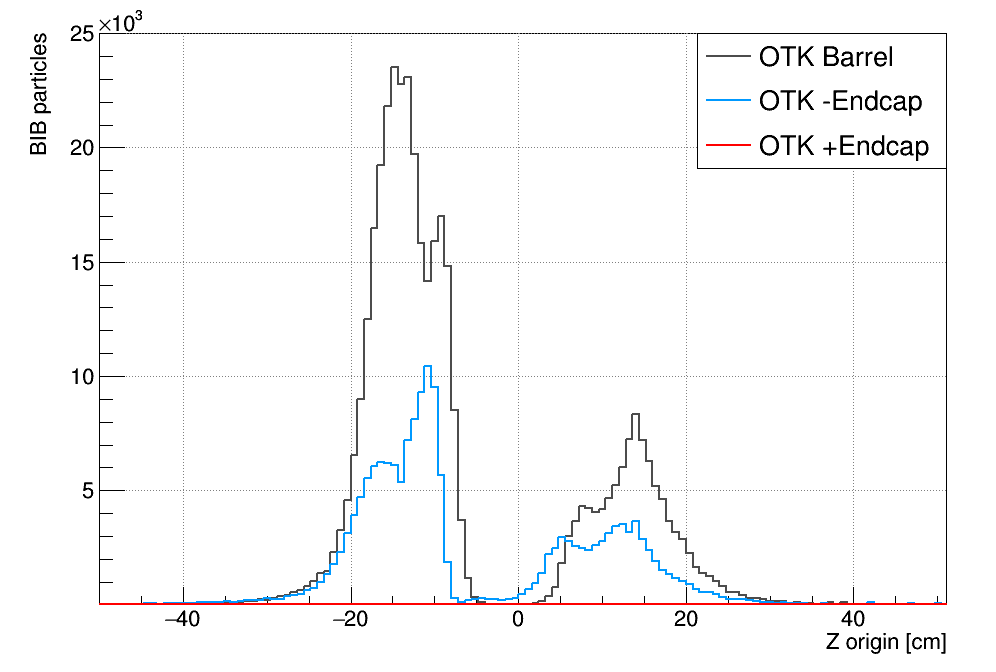

In [153]:
colors = [12, R.kAzure+7, 2]
leg = R.TLegend(0.7, 0.75, 0.95, 0.95)
# VXD
C.SetLogy(False)
legs = ['VXD Barrel', 'VXD -Endcap ', 'VXD +Endcap']
h_ax = R.TH1F('h_axis', ';Z origin [cm];BIB particles', 400, -200, 200)
h_ax.GetYaxis().SetMaxDigits(3)
h_ax.SetAxisRange(10, 45e3, 'Y')
h_ax.SetAxisRange(-50, 50, 'X')
h_ax.Draw()
for ih, _h in enumerate(histos[:3]):
    h = _h.Clone()
    h.Rebin(2)
    h.SetLineWidth(2)
    h.SetLineColor(colors[ih])
    leg.AddEntry(h, legs[ih], 'L')
    h.Draw('same hist')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/vxd_bib_vtx_z.pdf'))
# IB
C.SetLogy(False)
leg.Clear()
legs = ['ITK Barrel', 'ITK -Endcap ', 'ITK +Endcap']
h_ax = R.TH1F('h_axis', ';Z origin [cm];BIB particles', 400, -200, 200)
h_ax.GetYaxis().SetMaxDigits(3)
h_ax.SetAxisRange(10, 45e3, 'Y')
h_ax.SetAxisRange(-50, 50, 'X')
h_ax.Draw()
for ih, _h in enumerate(histos[3:6]):
    h = _h.Clone()
    h.Rebin(2)
    h.SetLineWidth(2)
    h.SetLineColor(colors[ih])
    leg.AddEntry(h, legs[ih], 'L')
    h.Draw('same hist')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/itk_bib_vtx_z.pdf'))
# OB
C.SetLogy(False)
leg.Clear()
legs = ['OTK Barrel', 'OTK -Endcap ', 'OTK +Endcap']
h_ax = R.TH1F('h_axis', ';Z origin [cm];BIB particles', 400, -200, 200)
h_ax.GetYaxis().SetMaxDigits(3)
h_ax.SetAxisRange(10, 25e3, 'Y')
h_ax.SetAxisRange(-50, 50, 'X')
h_ax.Draw()
for ih, _h in enumerate(histos[6:]):
    h = _h.Clone()
    h.Rebin(2)
    h.SetLineWidth(2)
    h.SetLineColor(colors[ih])
    leg.AddEntry(h, legs[ih], 'L')
    h.Draw('same hist')
leg.Draw()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/otk_bib_vtx_z.pdf'))